**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Análisis Avanzado de Datos

**Departamento:** Ingeniería Aeroespacial

**Facultad de Ingeniería - Universidad de Antioquia**

# Análisis Estadístico  - Enfoque Exploración de Datos

In [ ]:
import pandas as pd
import io
import requests
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.special import entr # Entropía de Shannon
from scipy.stats import uniform # función de densidad de probabilidad uniforme
from scipy import special # Funciones especiales
import matplotlib
from scipy.stats import kstest # test KS
import scipy.stats
from pandas import crosstab # Generador de tablas de contingencia
from scipy.stats import fisher_exact # Test exacto de Fisher
from scipy.stats import chisquare # Test Chi-Cuadrada
from statsmodels.stats.proportion import proportions_chisquare # Test Chi-Cuadrada para la igualdad de proporciones

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/concrete.dat"
download = requests.get(url).content
datos_concreto = pd.read_table(io.StringIO(download.decode('utf-8')), sep=',', decimal = ',') 
# Es importante codificarlo a utf-8
display(datos_concreto.head(10))

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,252.000000,0.000000,0.000000,185.000000,0.000000,1111.000000,784.000000,7.000000,13.710000
1,295.799988,0.000000,0.000000,185.699997,0.000000,1091.400024,769.299988,7.000000,14.840000
2,252.300003,0.000000,98.800003,146.300003,14.200000,987.799988,889.000000,3.000000,21.780001
3,172.399994,13.600000,172.399994,156.800003,4.100000,1006.299988,856.400024,28.000000,33.689999
4,162.000000,214.000000,164.000000,202.000000,10.000000,820.000000,680.000000,28.000000,30.650000
5,446.000000,24.000000,79.000000,162.000000,11.600000,967.000000,712.000000,56.000000,55.250000
6,540.000000,0.000000,0.000000,173.000000,0.000000,1125.000000,613.000000,14.000000,59.759998
7,154.800003,0.000000,142.800003,193.300003,9.100000,1047.400024,696.700012,28.000000,12.460000
8,167.399994,129.899994,128.600006,175.500000,7.800000,1006.299988,746.599976,56.000000,51.720001
9,277.000000,0.000000,0.000000,191.000000,0.000000,968.000000,856.000000,14.000000,21.260000


In [ ]:
datos_concreto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Cement                        1030 non-null   object
 1    BlastFurnaceSlag             1030 non-null   object
 2    FlyAsh                       1030 non-null   object
 3    Water                        1030 non-null   object
 4    Superplasticizer             1030 non-null   object
 5    CoarseAggregate              1030 non-null   object
 6    FineAggregate                1030 non-null   object
 7    Age                          1030 non-null   object
 8    ConcreteCompressiveStrength  1030 non-null   object
dtypes: object(9)
memory usage: 72.5+ KB


In [ ]:
datos_concreto = datos_concreto.astype(float)
datos_concreto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cement                        1030 non-null   float64
 1    BlastFurnaceSlag             1030 non-null   float64
 2    FlyAsh                       1030 non-null   float64
 3    Water                        1030 non-null   float64
 4    Superplasticizer             1030 non-null   float64
 5    CoarseAggregate              1030 non-null   float64
 6    FineAggregate                1030 non-null   float64
 7    Age                          1030 non-null   float64
 8    ConcreteCompressiveStrength  1030 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


## Relación entre variables o características

En la prueba de hipótesis que se utiliza en la estadísticas descriptiva, existen 3 herramientas para realizar varios tipos de análisis de acuerdo a la interacción o dependencia entre variables o atributos de los datos:

1.   **Relación entre variables nominales:** Analiza la interrelación entre los valores de variables nominales, mediante una *tabla de contingencia*. Ese tipo de tabla se calcula mediante las frecuencia de aparición de distintas combinaciones de valores de dos variables. Por lo general, este tipo análisis se realiza mediante el **test chi-cuadrada**, que veremos más adelante.
2.   **Relación entre variables numéricas-nominales:** Analiza las posibles relaciones entre dos variables, una de ellas numérica y la otra nominal, comparando medias y proporciones de los datos. En este método, la hipótesis nula se rechaza si las diferencias entre medias condicionadas a las etiquetas de la variable nominal son debidas a un proceso aleatorio. Por lo general, el **test t** y **ANOVA** son pruebas muy usuadas para este tipo de relaciones.
3.   **Relación entre variables numéricas:** Analiza las posibles relaciones de dos variables numéricas mediante un análisis de regresión o por covarianzas o por correlaciones. Las matrices de **correlación** y de **covarianza** son muy útiles para este tipo de análisis.

### Relación entre Variables Numéricas - Cuantitativas

#### Matriz de Covarianza

La **matriz de covarianza** es un arreglo de grados de relación lineal existente entre los valores de dos variables numéricas tal que $cov(x_n,x_m)$ es la covarianza entre un dato $x_n$ y otro dato $x_m$, tal que $n \neq m$. Si $n = m$, entonces se determina la varianza $var(x_n)$, que representará como la diagonal principal de la matriz.

$$\Sigma_x = \frac{1}{N} \sum_{n=1}^N (x_n - \mu_c)(x_n - \mu_c)^T$$

donde $N$ es el número de muestras y $\mu_c$ es la media de cada variable:

$$\mu_c = \frac{1}{N} \sum_{n=1}^N x_{n,c}$$

siendo $c = \lbrace 1, \ldots, K \rbrace$, donde $K$ es el número de variables. El arregolo matricial de $\Sigma_x$ tiene la siguiente representación:

$$\Sigma_x = \begin{bmatrix} var(x_1) & cov(x_1,x_2) & \ldots & cov(x_1,x_K)\\
cov(x_2,x_1) & var(x_2) & \ldots & cov(x_2,x_K)\\
\vdots & \vdots & \ddots & \cdots\\
cov(x_K,x_1) & cov(x_k,x_2) & \ldots & var(x_K) \end{bmatrix}$$

La covarianza se maximiza si dos vectores de datos son idénticos y si la covarianza es $0$ entonces ambos vectores son ortogonales. Si la covarianza tiene valores negativos significa que ambos vectores tienen direcciones opuestas.


Vamos a considerar las características *Cement*, *BlastFurnaceSlag*, *FlyAsh*, *Water*, *Superplasticizer*, *CoarseAggregate*, *FineAggregate* y *Age*, para generar la matriz de covarianza.

In [ ]:
Features = datos_concreto[['Cement',' BlastFurnaceSlag', ' FlyAsh', ' Water', ' Superplasticizer', 
                           ' CoarseAggregate', ' FineAggregate', ' Age']]

A partir de la selección de las columnas o características de la base de datos, generamos la matriz de covarianza

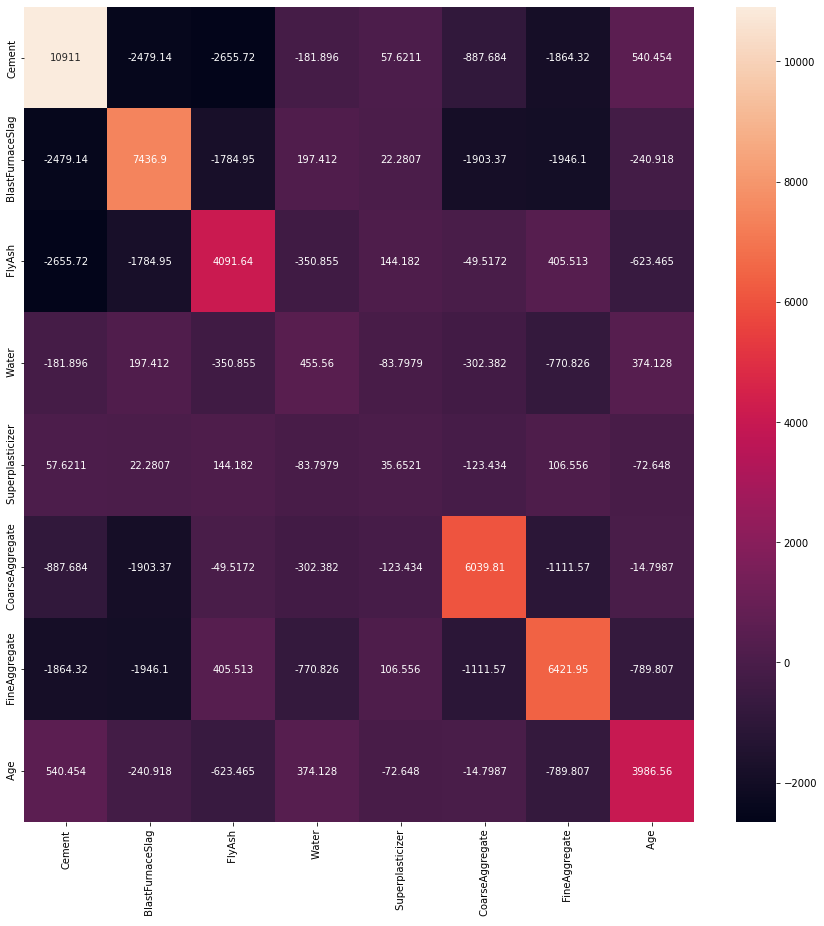

In [ ]:
Matrix_Covarianza = np.cov(Features.transpose(), bias=True) # bias = True normaliza los datos (les recomienda esa opción)
Caracteristicas = Features.columns

plt.figure(figsize=(15,15))
ax = sns.heatmap(Matrix_Covarianza, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

#### Matriz de Correlación

La **matriz de correlación** es la matriz de covarianza normalizada con las varianzas de cada variable o atributo. Definimos la varianza para la correlación, $\sigma_{x_i}^2$, como:

$$\sigma_{x_c}^2 = \frac{1}{N-1}\sum_{n=1}^N (x_{n,c} - \mu_c)^2 $$

Por consiguiente, la matriz de correlación tendrá el siguiente arreglo:

$$Cor_x = \begin{bmatrix} \frac{var(x_1)}{\sigma_{x_1}^2} & \frac{cov(x_1,x_2)}{\sigma_{x_1}^2\sigma_{x_2}^2} & \ldots & \frac{cov(x_1,x_K)}{\sigma_{x_1}^2\sigma_{x_K}^2}\\
\frac{cov(x_2,x_1)}{\sigma_{x_2}^2\sigma_{x_1}^2} & \frac{var(x_2)}{\sigma_{x_2}^2} & \ldots & \frac{cov(x_2,x_K)}{\sigma_{x_2}^2\sigma_{x_K}^2}\\
\vdots & \vdots & \ddots & \cdots\\
\frac{cov(x_K,x_1)}{\sigma_{x_K}^2\sigma_{x_1}^2} & \frac{cov(x_k,x_2)}{\sigma_{x_K}^2\sigma_{x_1}^2} & \ldots & \frac{var(x_K)}{\sigma_{x_K}^2} \end{bmatrix}$$

Por lo general, la diagonal principal es un vector de $1$. Si la correlación es cercano a $0$, significa que ambas variables son independientes y diferentes entre sí.

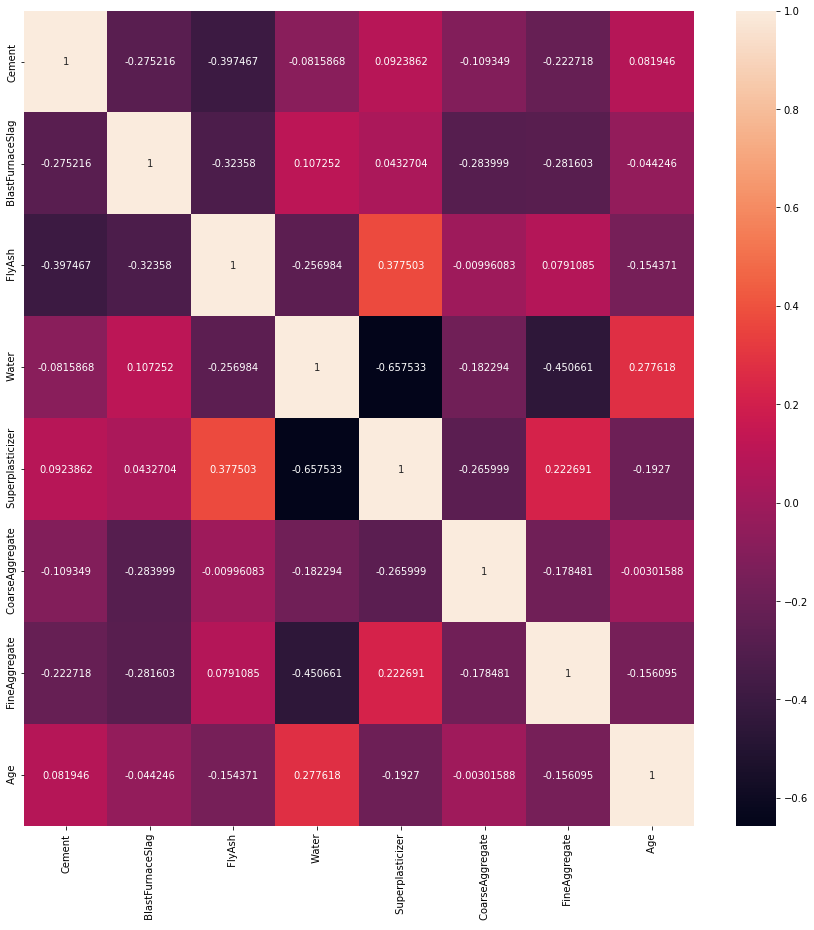

In [ ]:
Matriz_Correlacion = Features.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(Matriz_Correlacion, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

Analizando la matriz de correlación, ninguna característica o variable tienen una correlación mayor a 0.7 (obviando la diagonal principal de la matriz). Usualmente, se utiliza este umbral para definir si dos características son similares entre sí. Si se llegará a encontrar un valor de correlación de 0.7, se podría descartar una de las características.

#### Coeficiente de Correlación de Pearson

**Coeficiente de Correlación de Pearson:** El coeficiente de correlación de Pearson o de correlación producto-momento para una población y una muestra de datos, es una métrica que relaciona las variables basado en una correlación lineal. Por lo general, si el coeficiente es -1 entonces hay una correlación lineal negativa entre dos variables; si el coeficiente es 0 entonces no hay correlación entre dos variables; y si el coeficiente es +1 entonces hay correlación lineal positiva entre dos variables.

El coeficiente de correlación de Pearson para una muestra $r$ se expresa como:

$$r = \frac{S_{xy}}{\sqrt{S_{x}S_{y}}} = \frac{\sum_{n=1}^N (x_n - \mu_x)(y_n - \mu_y)}{\sqrt{\sum_{n=1}^N (x_n - \mu_x)^2}\cdot \sqrt{\sum_{n=1}^N (y_n - \mu_y)^2}}$$

donde $\mu_x$ y $\mu_y$ son las medias de $x$ e $y$, $S_x$ y $S_y$ son las sumas de los cuadrados de $x$ e $y$, y $S_xy$ es la suma de los cuadradados de tanto $x$ como $y$. Por lo general, $r \in \lbrack 0,1 \rbrack$, donde $r = 1$ significa que dos variables son altamente correlacionadas y $r = 0$ significa que no hay correlación entre las variables. Lo anterior es válido si la relación es lineal.

**Nota:** El valor de $r$ de Pearson puede ser engañoso si los datos tienen una relación no lineal, por lo que siempre se deben graficar los datos. En este caso, se debe visualizar que los puntos agrupados sean más estrechamente alrededor de una línea trazada a través de los datos. Para este caso, se recomienda hacer un análisis de regresión lineal simple o múltiple.

In [ ]:
r = []
valor_p = []
Data_cemento = Features.values
Data_cemento = np.asarray(Data_cemento)

for _,n in enumerate(np.arange(0,Data_cemento.shape[1])):
  for _,m in enumerate(np.arange(0,Data_cemento.shape[1])):  
      r_valor, p_valor = pearsonr(Data_cemento[:,n], Data_cemento[:,m])
      r.append(r_valor)
      valor_p.append(p_valor)

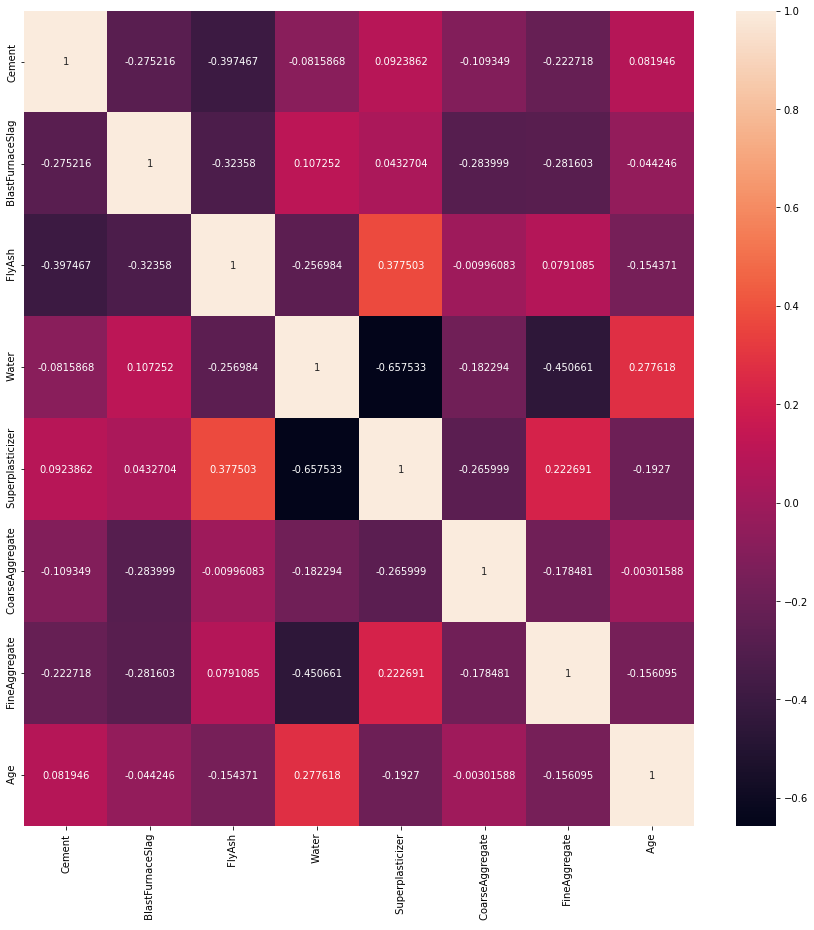

In [ ]:
r = np.asarray(r)
valor_p = np.asarray(valor_p)

pearson_r = r.reshape(Data_cemento.shape[1],Data_cemento.shape[1])
p_value = valor_p.reshape(Data_cemento.shape[1],Data_cemento.shape[1])

plt.figure(figsize=(15,15))
ax = sns.heatmap(pearson_r, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

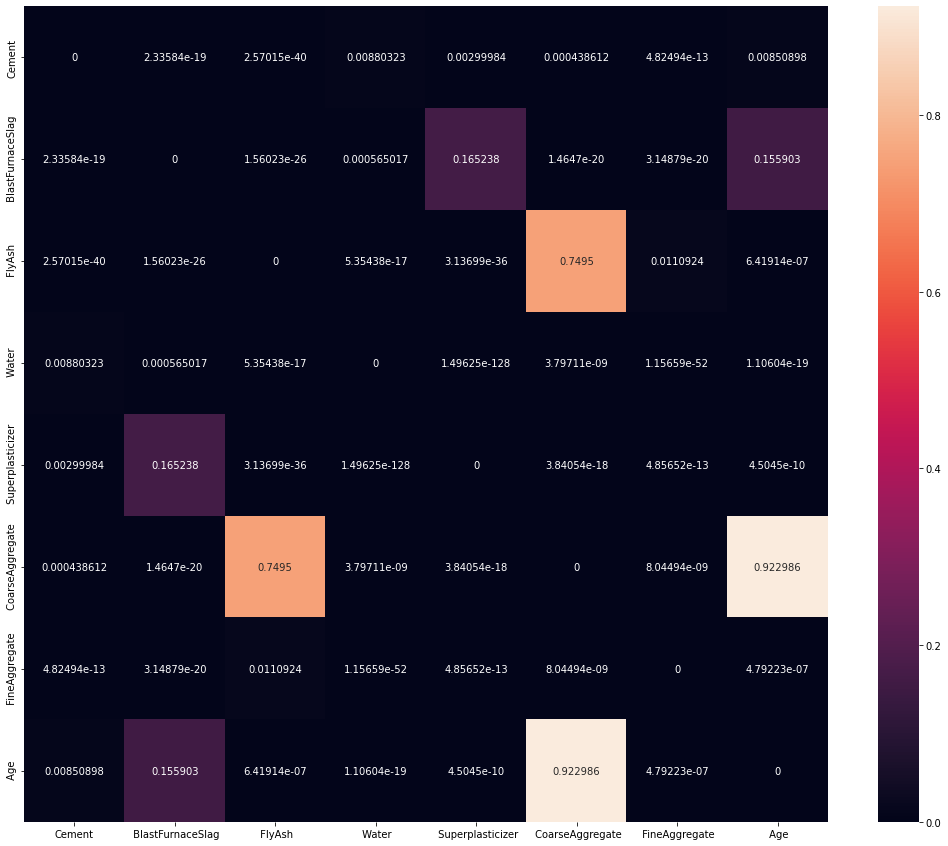

In [ ]:
plt.figure(figsize=(18,15))
ax = sns.heatmap(p_value, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

Observen que al organizar los valores del coeficiente de Pearson en una matriz entre características es exactamente igual a la matriz de correlación. No obstante, los coeficientes de Pearson nos permite obtener los valores p para anlizar con mayor detalle la relación entre características. En este caso, se observa:

1.   Las características *CoarseAggregate* y *FlyAsh* tienen un valor p por encima de 0.05. Lo mismo se identificó entre las características *Age - BlastFurnaceSlag*, *Superplasticizer - BlastFurnaceSlag* y *Age - CoarseAggregate*
2. Esta información permite verificar que para valores p $\geq$ 0.05, **no se rechaza la hipótesis nula** y por consiguiente, las características *Age - BlastFurnaceSlag*, *Superplasticizer - BlastFurnaceSlag* y *Age - CoarseAggregate* son similares entre sí.  

#### Correlación de Rango de Spearman

La **correlación de rango de Spearman** o coeficiente de correlación de Spearman se desarrollo para analizar los datos cuando hay presencia de datos atípicos o ruido (esa parte lo analizaremos en otra unidad), haciendo una medida más confiable de la prueba de hipótesis y el desempeño de los modelos de regresión. Por lo general, esta métrica calcula el rango de cada valor el cual es el índice de aparición de los valores. Por ejemplo, tenemos un vector de datos $\lbrack 1, 2, 5, 7 \rbrack$ y el valor $5$ esta ubicado en el índice $3$ y el valor $7$ esta ubicado en el índice $4$. 

Matemáticamente, la correlación de rango de Spearman se expresa como:

$$r = 1 - \frac{6\sum_{n=1}^N d_n^2}{N(N^2 - 1)}$$

donde $d_n^2$ es la diferencia entre un par de rangosy $N$ es el número de casos o rangos. $d_n^2$ por lo general se expresa como:

$$d_n^2 = (rg(X_n) - rg(Y_n))^2$$

siendo $rg(\cdot)$ el rango de valores ordenados de una variable. 

El coeficiente $r$ tiene un rango $\lbrack 0,1 \rbrack$, donde $r = 1$ representa la máxima correlación entre dos variables.

In [ ]:
spearman = []
valor_p = []
Data_cemento = Features.values
Data_cemento = np.asarray(Data_cemento)

for _,n in enumerate(np.arange(0,Data_cemento.shape[1])):
  for _,m in enumerate(np.arange(0,Data_cemento.shape[1])):  
      s_valor, p_valor = spearmanr(Data_cemento[:,n], Data_cemento[:,m])
      spearman.append(s_valor)
      valor_p.append(p_valor)

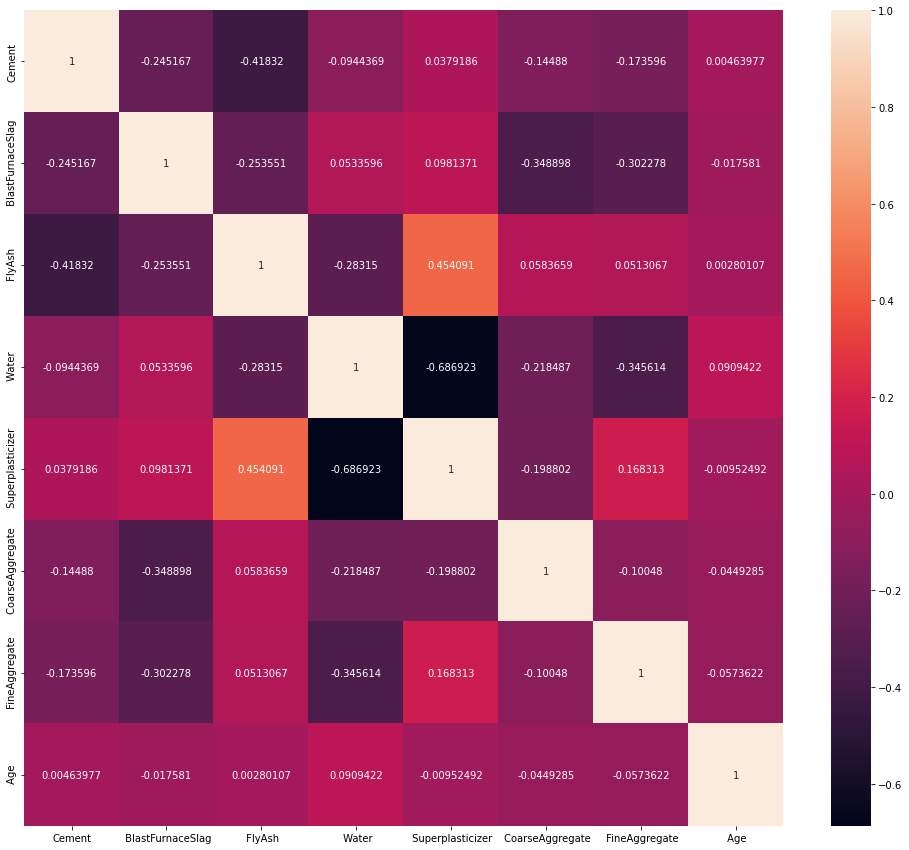

In [ ]:
spearman = np.asarray(spearman)
valor_p = np.asarray(valor_p)

spearman_r = spearman.reshape(Data_cemento.shape[1],Data_cemento.shape[1])
p_value = valor_p.reshape(Data_cemento.shape[1],Data_cemento.shape[1])

plt.figure(figsize=(17,15))
ax = sns.heatmap(spearman_r, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

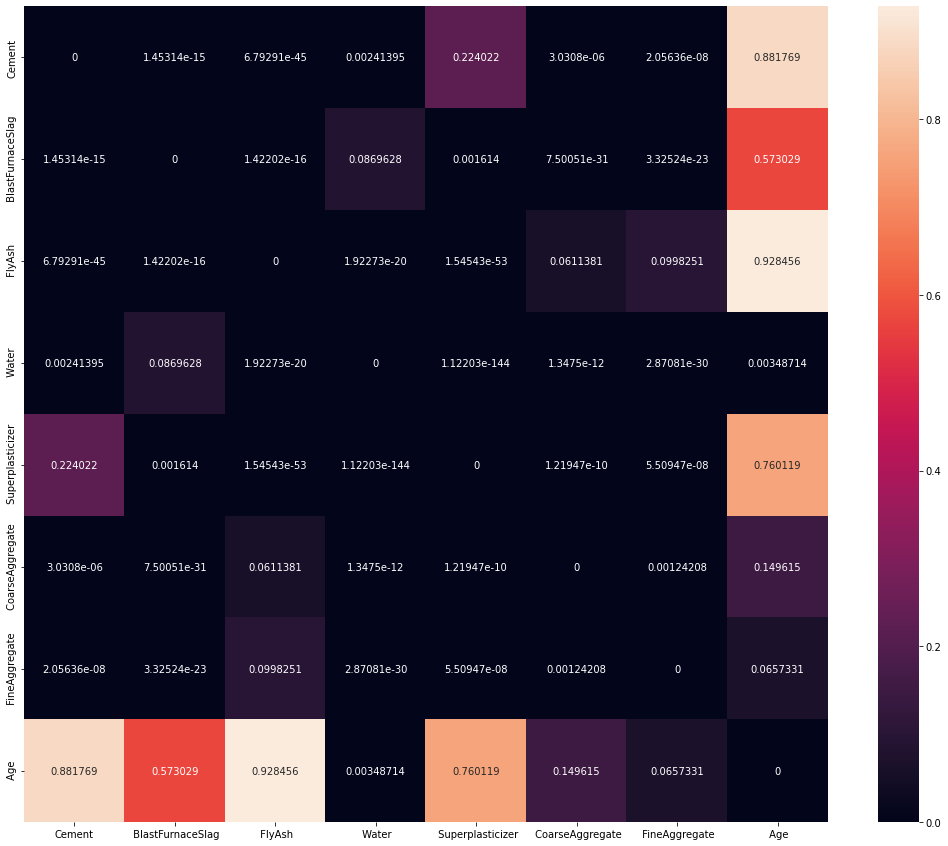

In [ ]:
plt.figure(figsize=(18,15))
ax = sns.heatmap(p_value, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

Considerando la matriz de valores p usando la correlación de rango de Spearman, es interesante ver la diferencia de resultados con respecto a la matriz de valores p con la correlación de Pearson. Es evidente que hay más relaciones entre características o variables que sobrepasa el umbral del valor p para el caso de la correlación de rango de Spearman. Para este caso, encontramos las siguientes relaciones que sobrepasan el valor p de 0.05:

1.   *Age - Cement*
2.   *Age - BlastfumaceSlag*
3.   *Age - FlyAsh*
4.   *Age - Superplasticizer*
5.   *Age - CoarseAggregate*
6.   *Age - FineAggregate*
7.   *FineAggregate - FlyAsh*
8.   *CoarseAggregate - FlyAsh*
9.   *Superplasticizer - Cement*
10.  *Water - BlastfumaceSlag*

Esta información permite verificar que para valores p $\geq$ 0.05, **no se rechaza la hipótesis nula** y por consiguiente, la relación entre características (1 - 10) son similares entre sí. 

#### Entropía

**La medida de la entropía de la información:** Por lo general, la entropía de una variable es la cantidad de información que contiene los datos en la variable, atributo o característica. En la práctica, se asume que los datos de la variable sigue una determinada distribución de densidad de probabilidad pero se asume una distribución de probabilidad uniforme (por ejemplo, la probabilidad de ganar un partido (50%) y la probabilidad de perder un partido (50%)). 


$$H(x) = - \sum_{n = 1}^N p(x_n) \log_2(p(x_n))$$

donde $x$ es el conjunto de valores de una variable o característica y $p(x_n)$ es la probabilidad de un evento que se genero en un dato $x_n$

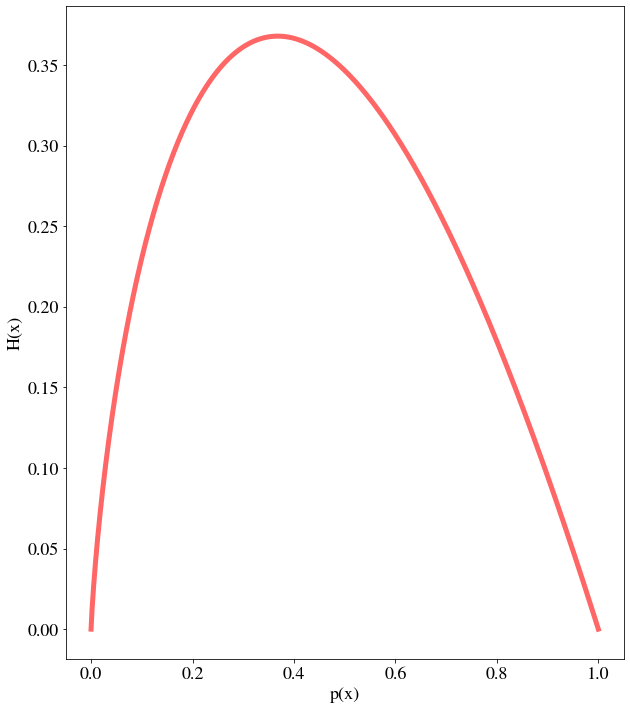

In [ ]:
p_x = np.linspace(uniform.ppf(0), uniform.ppf(1), 1000)
H = entr(p_x) # Calculo de la entropia

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(figsize=(10,12))
plt.plot(p_x, H, 'r-', lw = 5, alpha = 0.6, label = 'Entropia de Shannon')
plt.xlabel('p(x)')
plt.ylabel('H(x)') # OJO: la entropia no se muestra como la sumatoria \sum_{n=1}^N p(x)*log_2(p(x)), sino simplemente como -p(x)*log_2(p(x))
                   # Por esta razón, solo se muestra el valor de entropía por cada valor de probabilidad H(x).
                   
plt.show()

Si analizamos este grafico, hay tres puntos de importancia en el eje x de la figura. Para este caso, se considera el valor mínimo y máximo de la entropía

In [ ]:
H_min = np.array([p_x[np.argmin(H)], np.min(H)])
H_max = np.array([p_x[np.argmax(H)], np.max(H)])
H_inicial = np.array([p_x[0], H[0]])

Entropia = pd.DataFrame(np.vstack([H_inicial, H_max, H_min]), index = ['p(x_inicial)', 'p(x_medio)', 'p(x_final)'], columns = ['p(x)', 'H(x)'])
display(Entropia)

,p(x),H(x)
p(x_inicial),0.000000,0.000000
p(x_medio),0.368368,0.367879
p(x_final),0.000000,0.000000


Las probabilidades inicial y final indican la mínima entropía de un conjunto de datos $x$. Dichas probabilidades y valores de entropía indican la mínima incertidumbre de los datos $x$. Por otra parte, la máxima entropía indica que $x$ se comporta como una distribución uniforme y por consiguiente, la incertidumbre es alta. No obstante, como $H(x_\mathbf{medio}) = 0.36$, en realidad, no es una incertidumbre tan alta como se esperaba para este caso. Sin embargo, si $H(x_\mathbf{medio}) = 1$, este sería el peor escenario de todos puesto que la incertidumbre es tan alta que no se sabe cuál suceso se pueda generar, por ejemplo, si consideramos el lanzamiento de una moneda justa, al calcular las probabilidades $p(cara) = 0.5$ y $p(sello) = 0.5$, entonces $H(x) = 1$. En este caso, no se puede decidir si la moneda es cara o sello. 

Considerando la anterior explicación, vamos a calcular los valores de la entropía de Shannon a cada de las características o variables de nuestra base de datos. Se recomienda normalizar los datos en un rango entre 0 y 1.

In [ ]:
Features_Normalizado = (Features - Features.min())/(Features.max() - Features.min()) 

In [ ]:
H = special.entr(Features_Normalizado) 
# OJO: la entropia no se muestra como la sumatoria \sum_{n=1}^N p(x)*log_2(p(x)), sino simplemente como -p(x)*log_2(p(x))
# Por esta razón, solo se muestra el valor de entropía por cada valor de probabilidad H(x).

Ahora sumamos los valores de entropia de cada característica o columna de nuestra base de datos y luego, lo dividimos por el número de filas o muestras de nuestra base de datos para obtener el valor de entropía normalizado.

In [ ]:
entropia_normalizada = H.sum()/Features_Normalizado.shape[0]
entropia_normalizada = pd.DataFrame(entropia_normalizada, index = None, columns = ['Entropia Normalizada'])
display(entropia_normalizada)

,Entropia Normalizada
Cement,0.293685
BlastFurnaceSlag,0.166951
FlyAsh,0.126225
Water,0.319926
Superplasticizer,0.210198
CoarseAggregate,0.288824
FineAggregate,0.303713
Age,0.180096


Se puede apreciar que la máxima entropía se encuentra en la característica *Water* y la mínima entropía se encuentra en la característica *FlyAsh*. Los valores de entropía estan por debajo de 0.5, lo cual nos indica que la incertidumbre de los datos de cada característica no están crítico como se esperaba. Al nivel práctico, **un valor de entropía por encima de 0.8** indica una disminución considerable de la cantidad de información que contiene el conjunto de datos. Por consiguiente, si el valor de la entropía es mayor o igual a 0.8, la incertidumbre de los datos va a ser alto que puede generar una incertidumbre aleatoria de los datos, generando una incertidumbre epistémica o incertidumbre propia de la generación del modelo de machine learning, o de regresión, etc.

Si desean generar una tabla de entropias que relacione variables numéricas o entre características, la mejor opción es calcular la **entropía relativa**.

#### Entropía Relativa

**Entropía Relativa o divergencia de Kullback–Leibler (KL):** Es una métrica de entropía que permite medir si una distribución de densidad de probabilidad es diferente o no con respecto a otra distribución de densidad de probabilidad. Usualmente, la entropía relativa considera la otra densidad de probabilidad como la distribución de referencia para la medición.

$$KL(p \vert \vert q) = - \sum_{n=1}^N p(x_n) \log \left( \frac{p(x_n)}{q(x_n)} \right)$$

donde $q(x_n)$ es la función de densidad de probabilidad de referencia.

In [ ]:
entropia_relativa = []

for _,n in enumerate(Caracteristicas):
  for _,m in enumerate(Caracteristicas):
    Entropia_R = special.rel_entr(Features_Normalizado[n], Features_Normalizado[m])
    Entropia_R = pd.DataFrame(Entropia_R).replace(np.inf,0) # Reemplazamos los valores infinitos o inf por 0
    Entropia_R = Entropia_R.replace(-np.inf,0) # Reemplazamos los valores infinitos negativos o -inf por 0
    Suma_Entropia_R = Entropia_R.sum()/Features_Normalizado.shape[0]
    entropia_relativa.append(Suma_Entropia_R)

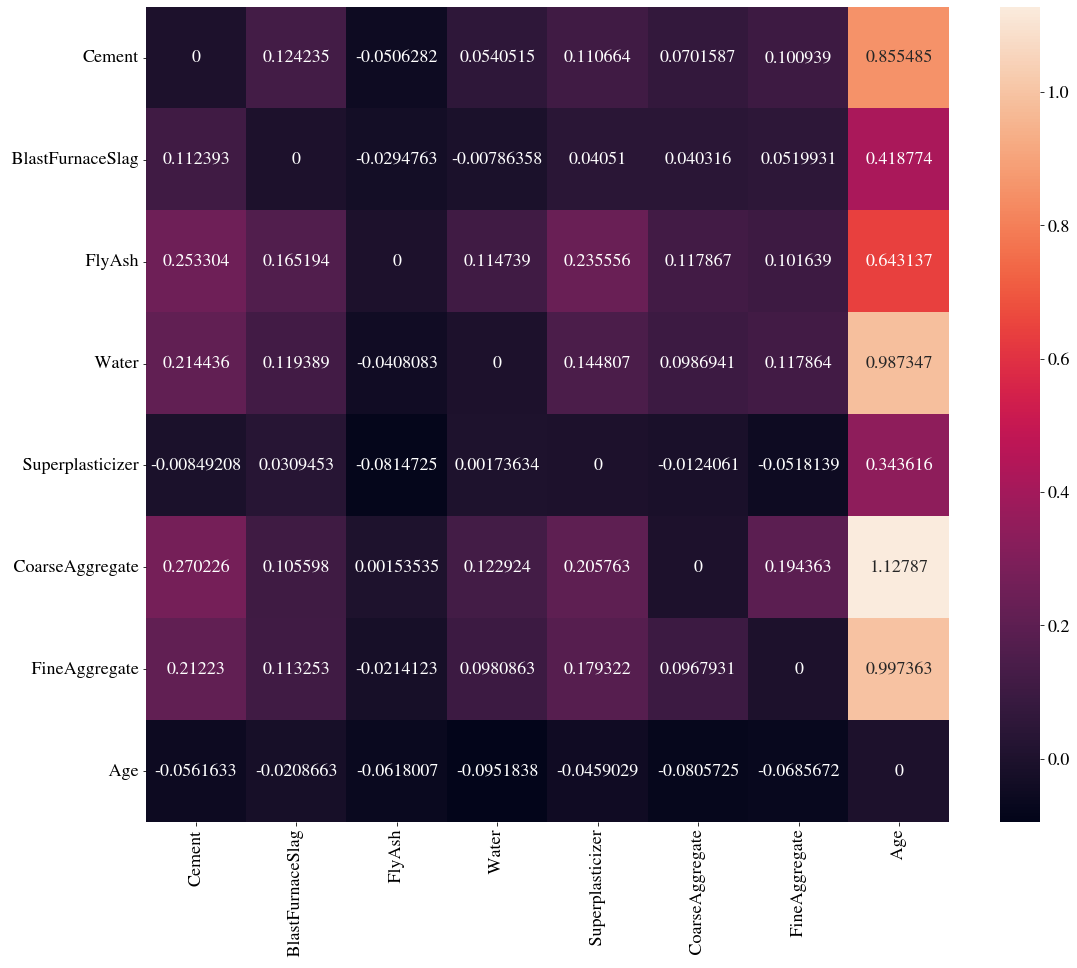

In [ ]:
entropia_relativa = np.asarray(entropia_relativa)
entropia_relativa = entropia_relativa.reshape(Features_Normalizado.shape[1],Features_Normalizado.shape[1])
entropia_relativa = pd.DataFrame(entropia_relativa, index = Caracteristicas, columns = Caracteristicas)

plt.figure(figsize=(18,15))
ax = sns.heatmap(entropia_relativa, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

Analizando la anterior matriz de entropía relativa, se observa que la diagonal de 0 representa cuando dos características son exactamente iguales, lo cual $p(x) = q(x)$. Analizando los valores por fuera de la diagonal principal de la matriz, hay algunos valores de entropía relativa cercanos a 0. En este caso, se identifican las siguientes relaciones entre variables numéricas o características (**Es importante considerar que la matriz de entropía relativa es asimétrica, es decir, $KL(p \vert \vert q) \neq  KL(q \vert \vert p)$**):

In [ ]:
pos = np.where((entropia_relativa >= -0.05) & (entropia_relativa.values <= 0.05))
pos = np.asarray(pos) # Se aplica la transpuesta de la matriz de posiciones
pos = pos.T # Se convierte en una lista de valores
pos = pd.DataFrame(pos)
contador = 0

for _,n in enumerate(Caracteristicas):
    pos = pos.replace(contador,n)
    contador = contador + 1

rel_caracteristicas = pd.DataFrame(pos.values, index = None, columns = ['Característica de referencia', 'Caracteristica auxiliar']) # Importante colocar pos.values para evitar que salga valores NaN
display(rel_caracteristicas)

,Característica de referencia,Caracteristica auxiliar
0,Cement,Cement
1,BlastFurnaceSlag,BlastFurnaceSlag
2,BlastFurnaceSlag,FlyAsh
3,BlastFurnaceSlag,Water
4,BlastFurnaceSlag,Superplasticizer
5,BlastFurnaceSlag,CoarseAggregate
6,FlyAsh,FlyAsh
7,Water,FlyAsh
8,Water,Water
9,Superplasticizer,Cement


Eliminando las características iguales:

In [ ]:
rel_caracteristicas = rel_caracteristicas.drop([0,1,6,8,12,15,17,20]) # Elimina las filas deseadas
display(rel_caracteristicas)

,Característica de referencia,Caracteristica auxiliar
2,BlastFurnaceSlag,FlyAsh
3,BlastFurnaceSlag,Water
4,BlastFurnaceSlag,Superplasticizer
5,BlastFurnaceSlag,CoarseAggregate
7,Water,FlyAsh
9,Superplasticizer,Cement
10,Superplasticizer,BlastFurnaceSlag
11,Superplasticizer,Water
13,Superplasticizer,CoarseAggregate
14,CoarseAggregate,FlyAsh


Para analizar si dos características son similares o no, sugiero que seleccionen aquellas relaciones entre características que sean recíprocas, es decir, por ejemplo: *BlastFurnaceSlag - Superplasticizer* y *Superplasticizer - BlastFurnaceSlag*

#### KS Test

El test KS o test Kolmogorov–Smirnov determina si dos muestras son significativamente diferentes una de la otra, mediante una comprobación de la uniformidad de los valores de los datos (distribución uniforme) o mediante un análisis si dos distribuciones de probabilidad son diferentes entre sí. Para lograr este análisis, el test KS cuantifica una distancia entre una función de distribución de probabilidad de prueba de la muestra y la función de distribución acumulativa de una distribución de referencia o conocida. Además, se puede cuantificar una distancia entre funciones de probabilidad de prueba de dos muestras.

La hipótesis nula del test asume que los valores de los datos son uniformemente distribuidos entre 0 y 1. Si se rechaza la hipótesis nula, entonces los valores no son uniformemente distribuidos entre 0 y 1. El hecho de que no se rechace la hipótesis nula no significa necesariamente que los valores sigan la distribución uniforme. Pueden ser otra distribución como la *normal o Gaussiana*.

Vamos a considerar:

*   $H_0$ : Los datos analizados siguen una distribución de densidad de probabilidad.

*   $H_1$ : Los datos analizados **no** siguen una distribución de densidad de probabilidad

También se puede interpretar desde el punto de vista de la distribución de densidad de probabilidad normal:

1.   $H_0$: No hay diferencia estadísticamente significativa entre la distribución de la población a que pertenece la muestra y la distribución normal.
2.   $H_1$: Hay diferencia estadísticamente significativa entre la distribución de la población a que pertenece la muestra y la distribución normal.

In [ ]:
Features.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567281,6.204660,972.918932,773.580484,45.662136
std,104.506364,86.279341,63.997004,21.354218,5.973841,77.753955,80.175980,63.169912
min,102.000000,0.000000,0.000000,121.800003,0.000000,801.000000,594.000000,1.000000
25%,192.375000,0.000000,0.000000,164.899994,0.000000,932.000000,730.950012,7.000000
50%,272.899994,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000
75%,350.000000,142.950001,118.300003,192.000000,10.200000,1029.400024,824.000000,56.000000
max,540.000000,359.399994,200.100006,247.000000,32.200001,1145.000000,992.599976,365.000000


In [ ]:
nombres = ['beta', 'gamma', 'expon', 'chi2', 'norm', 't', 'uniform', 'lognorm', 'pearson3']
ks_valor = []
p_valor = []
Data = Features_Normalizado.values

for distribuciones in nombres:
    dis = getattr(scipy.stats, distribuciones)
    for _,n in enumerate(Caracteristicas):
      A = np.asarray(Features_Normalizado[n])
      par = dis.fit(A) # Calculamos la máxima verosimilitud de los datos, de acuerdo a la distribución de densidad de probabilidad
      D, p = scipy.stats.kstest(Features_Normalizado[n], distribuciones, N = 200, mode = 'approx', args = par) 
      # Colocamos los datos que queremos analizar (KS solo analiza una columna o característica de los datos, 
      # por esta razón, se usa un ciclo for para analizar todas las columnas de interés de la base de datos)
      # N = tamaño de la muestra de los datos (recomiendo N >= 20)
      pp = np.around(p, 10) # Se muestran las 10 primeras cifras significativas del valor p
      DD = np.around(D, 5) # Se muestran las 5 primeras cifras significativas del valor KS
      p_valor.append(pp)
      ks_valor.append(DD)

ks_valor = np.asarray(ks_valor)
p_valor = np.asarray(p_valor)

ks_valor = ks_valor.reshape(len(nombres), Features_Normalizado.shape[1]) 
# Los valores ks son organizados en una matriz de D-distribuciones de probabilidad x Número de columnas o características de los datos 
p_valor = p_valor.reshape(len(nombres),Features_Normalizado.shape[1]) 
# Los valores p son organizados en una matriz de D-distribuciones de probabilidad x Número de columnas o características de los datos

ks_valor = pd.DataFrame(ks_valor, index = nombres, columns = Caracteristicas)
p_valor = pd.DataFrame(p_valor, index = nombres, columns = Caracteristicas)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [ ]:
display(ks_valor)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
beta,0.04085,0.45728,0.54951,0.08028,0.46893,0.09137,0.07228,0.23789
gamma,0.05609,0.45728,0.54951,0.07806,0.48432,0.06544,0.09624,0.51014
expon,0.17238,0.45728,0.54951,0.34269,0.36796,0.30007,0.29343,0.27351
chi2,0.05610,0.45718,0.54951,0.08655,0.36796,0.07947,0.10499,0.23386
norm,0.07861,0.26153,0.35106,0.07359,0.21859,0.06374,0.08565,0.33734
t,0.07861,0.54267,0.55659,0.07567,0.21948,0.06375,0.08566,0.30336
uniform,0.19706,0.45728,0.54951,0.25909,0.52325,0.14723,0.19657,0.66783
lognorm,0.06352,0.48658,0.54951,0.07808,0.40485,0.06579,0.08712,0.24854
pearson3,0.05610,0.45728,0.54951,0.07801,0.36796,0.06078,0.07096,0.21747


In [ ]:
display(p_valor)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
beta,0.062496,0.0,0.0,3.192900e-06,0.0,6.210000e-08,3.998770e-05,0.0
gamma,0.002940,0.0,0.0,6.610900e-06,0.0,2.802198e-04,9.400000e-09,0.0
expon,0.000000,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0
chi2,0.002935,0.0,0.0,3.665000e-07,0.0,4.173600e-06,2.000000e-10,0.0
norm,0.000006,0.0,0.0,2.687200e-05,0.0,4.415467e-04,5.047000e-07,0.0
t,0.000006,0.0,0.0,1.414970e-05,0.0,4.412189e-04,5.037000e-07,0.0
uniform,0.000000,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0
lognorm,0.000468,0.0,0.0,6.574200e-06,0.0,2.551776e-04,2.990000e-07,0.0
pearson3,0.002937,0.0,0.0,6.718900e-06,0.0,9.463242e-04,5.908600e-05,0.0


Al cambiar el número de muestras N del test KS, el valor p para todas las características o columnas de la base de datos son iguales a 0. Por consiguiente, se concluye que $valor_p < 0.05$: Se rechaza $H_0$ o se rechaza la hipótesis nula. En este caso, no hay diferencia estadísticamente significativa entre la distribución de la población a que pertenece la muestra y la distribución normal, lo cual, podemos afirmar que las variables o características de los datos siguen otra distribución de densidad de probabilidad diferente a las analizadas previamente.

## Relación entre Variables Nominales o Categóricas

In [ ]:
url = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/adult.data"
download = requests.get(url).content
columnas = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_table(io.StringIO(download.decode('utf-8')), sep=',', 
                     names = columnas, decimal = ',', header = None) 
# Esimportante codificarlo a utf-8
display(data.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Test Exacto de Fisher

El test exacto de Fischer calcula la probabilidad de una entrada particular de una **tabla de contingencia**, condicionado por filas de valores marginales y columna de sumas de valores. Considerando que este test considera una tabla de contingencia, dicha tabla es una representación de la partición de una muestra poblacional de dos categorías entre dos diferentes clasificaciones, como se muestra en la tabla ejemplo:

|      |Vendido |No Vendido | Total |
|------------|------|------|------|
|T-shirt|13|11|24|
|------------|------------|------------|------------|
|Camisas|12|1|13|
|------------|------------|------------|------------|
|Total|25|12|37|
|----------------|------------|------------|------------|

La pregunta que se formula a partir de esta tabla es la siguiente: la tabla corresponde o no a una partición aleatoria de la muestra poblacional, condensado por sumas marginales. Note que debido a esta tabla de 2x2, un cambio de algún valor automáticamente afecta todo los valores restantes de las sumas. Para analizar este tipo de casos, el test exacto de Fisher permite resolver esta inquietud, mediante una **distribución hipérgeométrica**:

$$\mathbb{P}(X = k) = \frac{\binom{K}{k}\binom{N-K}{n-k}}{\binom{N}{n}}$$

donde:

*   $\mathbb{P}(X = k) = \mathbb{P}(X_{i,j} \vert r_1,r_2,c_1,c_2)$ es la probabilidad de un valor particular de la tabla de contingencia, siendo $i,j$ una ubicación de una celda de la tabla, $r_1$ es la suma de la primera fila, $r2$ es la suma de la segunda fila, $c_!$ es la suma de la primera columna y $c_2$ es la suma de la segunda columna.
*   $N$ es el tamaño de la población.
*   $K$ es el número total de posibles valores favorables.
*   $n$ es el número de valores favorables.
*   $k$ es el número de valores favorables observados.

Por convención, $K = r_1$, $k = x$, $n = c_1$ y $N = c_1 + c_2$. 

Seleccionando dos columnas de la base de datos que contengan solo dos categorías

In [ ]:
Categorias_gender = pd.Categorical(data['gender']).unique()
display(Categorias_gender)

[' Male', ' Female']
Categories (2, object): [' Female', ' Male']

In [ ]:
Categorias_income = pd.Categorical(data['income']).unique()
display(Categorias_income)

[' <=50K', ' >50K']
Categories (2, object): [' <=50K', ' >50K']

In [ ]:
datos_select = data[['gender','income']]
display(datos_select)

,gender,income
0,Male,<=50K
1,Male,<=50K
2,Male,<=50K
3,Male,<=50K
4,Female,<=50K
...,...,...
32556,Female,<=50K
32557,Male,>50K
32558,Female,<=50K
32559,Male,<=50K


A partir de los datos seleccionados, vamos a generar una tabla de contingencia de 2 x 2:

In [ ]:
contingencia_gender_income = pd.crosstab(datos_select['gender'], datos_select['income'])
display(contingencia_gender_income)

income,<=50K,>50K
gender,,
Female,9592,1179
Male,15128,6662


Ahora vamos a sumar las filas y las columnas de la tabla de contingencia:

In [ ]:
Suma_Filas = contingencia_gender_income.sum(axis = 1)
Suma_Filas = pd.DataFrame(Suma_Filas, columns = ['Suma Filas'])
Suma_Columnas = contingencia_gender_income.sum(axis = 0)
Suma_Columna = pd.DataFrame(Suma_Columnas, columns = ['Suma Columnas'])
contingencia_1 = pd.concat([contingencia_gender_income, Suma_Filas], axis = 1)
contingencia_2 = pd.concat([contingencia_1, Suma_Columna.T], axis = 0)
display(contingencia_2)

,<=50K,>50K,Suma Filas
Female,9592,1179,10771.0
Male,15128,6662,21790.0
Suma Columnas,24720,7841,NaN


In [ ]:
contingencia_2 = contingencia_2.fillna(Suma_Filas.sum())
display(contingencia_2)

,<=50K,>50K,Suma Filas
Female,9592,1179,10771.0
Male,15128,6662,21790.0
Suma Columnas,24720,7841,32561.0


Considerando esta tabla, se observa que 24720 hombres y mujeres de la población total de 32561 encuestados tienen ingresos anuales por debajo de 50K, y 7841 hombres y mujeres de la población total de encuestados tienen ingresos anuales por encima de 50K. Asumiendo la hipótesis nula de que los encuestados tienen la misma probabilidad de tener ingresos inferiores o superiores a 50K, 
¿Los encuestados se distribuirían tan desigualmente entre ingresos inferiores o superiores a 50K?

*   $H_0$ : Las variables son independientes por lo que una variable no varía entre los distintos niveles de la otra variable.
*   $H_A$: Las variables son dependientes, una variable varía entre los distintos niveles de la otra variable.

A partir de la tabla de contingencia, vamos a aplicar el test exacto de Fisher para responder a esa pregunta:

In [ ]:
tasa_pares_1, p_valor_1 = fisher_exact(contingencia_gender_income, alternative = 'two-sided')
tasa_pares_2, p_valor_2 = fisher_exact(contingencia_gender_income, alternative = 'less')
tasa_pares_3, p_valor_3 = fisher_exact(contingencia_gender_income, alternative = 'greater')

# tasa_pares es una proporción de probabilidades previas y no una estimación posterior.

resultado_Fisher = pd.DataFrame(np.array([[tasa_pares_1, tasa_pares_2, tasa_pares_3], [p_valor_1, p_valor_2, p_valor_3]]).T, index = ['two-sided', 'less', 'greater'], columns = ['Tasa Fisher', 'Valor-p'])

display(resultado_Fisher)

,Tasa Fisher,Valor-p
two-sided,3.582766,0.0
less,3.582766,1.0
greater,3.582766,0.0


Centrando nuestro interés en el valor p usando la opción **two-sided**, el test estimó un valor p de 0.0. Este resultado indica que la tabla de contingencia es estadísticamente significativo y hay evidencias para rechazar la $H_0$, lo cual los generos de los encuestados son dependientes de los ingresos que reciben anualmente. Por consiguiente, los encuestados si se distribuirían tan desigualmente entre ingresos inferiores o superiores a 50K 

### Test Chi-Cuadrada

El test Chi-Cuadrada evalua las relaciones entre dos o más variables categóricas, implicando un cálculo de la distribución chi-cuadrada de las probabilidades que se desean encontrar a partir de la tabla de contingencia. En la literatura, hay varios tipos de test chi-cuadrada:

1.   Test chi-cuadrada para la independencia entre variables.
2.   Test chi-cuadrada para la igualdad de proporciones.
3.   Test chi-cuadrada para la bondad del ajuste.

Explicaremos los dos primeros tipos de test chi-cuadrada.

#### Test chi-cuadrada para la independencia entre variables

Este tipo de test es aplicable para un análisis bivariable nominales y determina si es rechazable la hipótesis que dos variables son independientes o no. Bajo una hipótesis nula se determinan los casos en el supuesto de variables son independientes. Los valores esperados se determinan con probabilidades marginales de las categorías. A partir de estas probabilidades, el test $\mathcal{X}^2$ mide la diferencia entre los valores esperados y los valores observados, de acuerdo al grado de libertad de la distribución chi-cuadrada:

$$\mathcal{X}^2 = \sum_{i=1}^{p_1} \sum_{j=1}^{p_2} \frac{(E_{i,j} - O_{i,j})^2}{E_{i,j}}$$

siendo $E_{i,j}$ y $O_{i,j}$ el valor esperado y el valor observado entre una fila $i$ con respecto a una columna $j$. Esta expresión esta bajo el supuesto de la hipótesis nula que sigue una distribución chi-cuadrada. Si no se cumple la hipótesis nula, entonces las variables son dependientes entre sí.

Para calcular $E_{i,j}$, se realiza la siguiente operación matemática:

$$E_{i,j} = \frac{Total_{filas}xTotal_{Columnas}}{Total_{filas\,\, y\,\, columnas}}$$

Consideremos la tabla de contingencia usada en el test exacto de Fisher (valores observados):

|      |Vendido |No Vendido | Total |
|------------|------|------|------|
|T-shirt|13|11|24|
|------------|------------|------------|------------|
|Camisas|12|1|13|
|------------|------------|------------|------------|
|Total|25|12|37|
|----------------|------------|------------|------------|

$$E_{1,1} = \frac{24x25}{37} = 22.2$$
$$E_{1,2} = \frac{24x12}{37} = 7.78$$
$$E_{2,1} = \frac{13x25}{37} = 8.78$$
$$E_{2,2} = \frac{13x12}{37} = 4.21$$

Entonces la tabla de valores esperados es la siguiente:

|      |Vendido |No Vendido | Total |
|------------|------|------|------|
|T-shirt|22.2|7.78|29.98|
|------------|------------|------------|------------|
|Camisas|8.78|4.21|12.99|
|------------|------------|------------|------------|
|Total|30.98|11.99|42.97|
|----------------|------------|------------|------------|

Teniendo en cuenta esa forma de operación, veamos como se aplica en Python

In [ ]:
display(contingencia_2)

,<=50K,>50K,Suma Filas
Female,9592,1179,10771.0
Male,15128,6662,21790.0
Suma Columnas,24720,7841,32561.0


In [ ]:
tabla_valores_esperados = []
valores_contingencia = np.asarray(contingencia_2.values)

for _,m in enumerate(np.arange(0, contingencia_2['Suma Filas'].shape[0] - 1)):
  for _,n in enumerate(np.arange(0, contingencia_2['Suma Filas'].shape[0] - 1)):
    E = valores_contingencia[m, contingencia_2.shape[0] - 1] * valores_contingencia[contingencia_2.shape[0] - 1, n] / contingencia_2.loc['Suma Columnas','Suma Filas']
    tabla_valores_esperados.append(E)

tabla_valores_esperados = np.asarray(tabla_valores_esperados)
tabla_valores_esperados = pd.DataFrame(tabla_valores_esperados.reshape(contingencia_2.shape[0] - 1,contingencia_2.shape[0] - 1), index = ['Female', 'Male'], columns = ['<=50K', '>50K'])
display(tabla_valores_esperados)

,<=50K,>50K
Female,8177.240257,2593.759743
Male,16542.759743,5247.240257


In [ ]:
Suma_Filas = tabla_valores_esperados.sum(axis = 1)
Suma_Filas = pd.DataFrame(Suma_Filas, columns = ['Suma Filas'])
Suma_Columnas = tabla_valores_esperados.sum(axis = 0)
Suma_Columna = pd.DataFrame(Suma_Columnas, columns = ['Suma Columnas'])
contingencia_1_esperado = pd.concat([tabla_valores_esperados, Suma_Filas], axis = 1)
contingencia_2_esperado = pd.concat([contingencia_1_esperado, Suma_Columna.T], axis = 0)
display(contingencia_2_esperado)

,<=50K,>50K,Suma Filas
Female,8177.240257,2593.759743,10771.0
Male,16542.759743,5247.240257,21790.0
Suma Columnas,24720.000000,7841.000000,NaN


In [ ]:
contingencia_2_esperado = contingencia_2_esperado.fillna(Suma_Filas.sum())
display(contingencia_2_esperado)

,<=50K,>50K,Suma Filas
Female,8177.240257,2593.759743,10771.0
Male,16542.759743,5247.240257,21790.0
Suma Columnas,24720.000000,7841.000000,32561.0


In [ ]:
chi_valores, p_valores = chisquare(np.asarray(contingencia_gender_income.values), 
                                   f_exp = np.asarray(tabla_valores_esperados.values), 
                                   ddof = 0) # ddof son los grados de libertad de la distribución chi-cuadrada

In [ ]:
resultados = pd.DataFrame(np.array([chi_valores, p_valores]).T, index = ['Female / <=50K y >50k','Male / <=50K y >50k'], columns = ['valor Chi-Cuadrada', 'Valor p'])

display(resultados)

,valor Chi-Cuadrada,Valor p
Female / <=50K y >50k,365.762463,1.566215e-81
Male / <=50K y >50k,1153.124357,9.394065e-253


*   $H_0$: “La población de mujeres y hombres encuestados es *independiente* del ingreso anual”.
*   $H_A$: “La población de mujeres y hombres encuestados es *dependiente* del ingreso anual”.

Considerando que ambos casos de la tabla de resultados del test chi-cuadrado generan un valor p cercano a 0, hay evidencias para rechazar $H_0$ y afirmar que la población de mujeres y hombres encuestados es dependiente del ingreso anual

#### Test chi-cuadrada para la igualdad de proporciones

Este tipo de test calcula exactamente de la misma forma que el test anterior, pero se prueba una estrategía diferente de hipótesis. En este caso, la prueba de igualdad de proporciones se utiliza para los datos que se han extraído de múltiples poblaciones independientes, y la hipótesis nula es que la distribución de alguna variable es la misma en todas poblaciones. Por ejemplo, podríamos extraer muestras aleatorias de diferentes grupos étnicos y probar si las tasas de diagnóstico de cáncer de pulmón son iguales o diferentes en todas las poblaciones; nuestra hipótesis nula sería que son las mismas.

Veamos un ejemplo con este tipo de test.

In [ ]:
display(contingencia_gender_income)

income,<=50K,>50K
gender,,
Female,9592,1179
Male,15128,6662


In [ ]:
contingencia_gender_income = pd.DataFrame(contingencia_gender_income.values, index = ['Female', 'Male'], columns = ['<=50K', '>50K'])
display(contingencia_gender_income)

,<=50K,>50K
Female,9592,1179
Male,15128,6662


In [ ]:
Suma_Filas = contingencia_gender_income.sum(axis = 1)
Suma_Filas = pd.DataFrame(Suma_Filas, columns = ['Suma Filas'])
display(Suma_Filas)

,Suma Filas
Female,10771
Male,21790


In [ ]:
chi_valor_1, p_valor_1, _ = proportions_chisquare(contingencia_gender_income.loc['Female'][:].values, nobs = Suma_Filas)
chi_valor_2, p_valor_2, _ = proportions_chisquare(contingencia_gender_income.loc['Male'][:].values, nobs = Suma_Filas)

In [ ]:
print('Valor Chi-Cuadrada mujeres y hombres con respecto a los ingresos = {:.3f} y {:.3f}'.format(chi_valor_1, chi_valor_2))
print('\n')
print('p - valor Chi-Cuadrada mujeres y hombres con respecto a los ingresos = {:.20f} y {:.20f}'.format(p_valor_1, p_valor_2))

Valor Chi-Cuadrada mujeres y hombres con respecto a los ingresos = 17342.193 y 64337.724


p - valor Chi-Cuadrada mujeres y hombres con respecto a los ingresos = 0.00000000000000000000 y 0.00000000000000000000


*   $H_0$ = las poblaciones de hombres y mujeres son desproporcionados 
*   $H_A$ = las poblaciones de hombres y mujeres son proporcionados.

Los valores p que se obtuvieron son 0. Lo anterior indica que se **rechaza la hipótesis nula** que la distribución de las poblaciones de mujeres y hombres es la misma en todos los encuestados, teniendo en cuenta los ingresos anuales.

**Nota**: Recomiendo investigar una corrección del test chi-cuadrada llamado **corrección de Yates por continuidad**, el cual es un procedimiento desarrollado por Frank Yates que mejora el análisis de las tablas de contingencia para tablas 2x2.